In [11]:
import pandas as pd
from glob import glob

In [12]:
files = glob(f'predictors*.xlsx')
df = pd.concat(pd.read_excel(excel_file) for excel_file in files)

In [13]:
metrics = [
    'type', 'generator', 'roc_auc', 'accuracy', 'balanced_accuracy', 'recall', 'score_test', 'f1', 'f1_macro', 'f1_micro'
]
sort_metrics = metrics[2:]

In [14]:
# Revisar 'fit_time', 'memory_size',     'log_loss' en otros gráficos

In [15]:
df

,model,score_test,roc_auc,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,average_precision,precision,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,NeuralNetFastAI_r194_FULL,1.000000,1.000000,0.906250,0.940000,0.823529,0.879850,0.906250,1.000000,0.700000,...,"{'layers': [400, 200, 100], 'emb_drop': 0.5117...","{'epochs': 21, 'best_epoch': 12}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
1,NeuralNetFastAI_r187_FULL,1.000000,1.000000,0.875000,0.920000,0.777778,0.845411,0.875000,1.000000,0.636364,...,"{'layers': [200, 100, 50], 'emb_drop': 0.50749...","{'epochs': 42, 'best_epoch': 26}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
2,NeuralNetFastAI_r100_FULL,1.000000,1.000000,0.843750,0.900000,0.736842,0.812865,0.843750,1.000000,0.583333,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
3,NeuralNetFastAI_r69_FULL,1.000000,1.000000,0.875000,0.920000,0.777778,0.845411,0.875000,1.000000,0.636364,...,"{'layers': [200, 100, 50], 'emb_drop': 0.32096...","{'epochs': 21, 'best_epoch': 10}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
4,NeuralNetFastAI_r138_FULL,1.000000,1.000000,0.843750,0.900000,0.736842,0.812865,0.843750,1.000000,0.583333,...,"{'layers': [800, 400], 'emb_drop': 0.086691092...","{'epochs': 45, 'best_epoch': 26}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,NeuralNetFastAI_r102,0.799235,0.964286,0.967742,0.979167,0.933333,0.956028,0.967742,0.826020,0.875000,...,"{'layers': [200, 100], 'emb_drop': 0.050704113...","{'epochs': 29, 'best_epoch': 20}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
214,ExtraTrees_r4_FULL,0.785563,0.892857,0.774194,0.702381,0.533333,0.692199,0.774194,0.795331,0.500000,...,"{'n_estimators': 300, 'max_leaf_nodes': 19935,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
215,ExtraTrees_r4,0.753637,0.863095,0.774194,0.702381,0.533333,0.692199,0.774194,0.763348,0.500000,...,"{'n_estimators': 300, 'max_leaf_nodes': 19935,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
216,NeuralNetTorch_r30,0.683759,0.922619,0.903226,0.937500,0.823529,0.878431,0.903226,0.716327,0.700000,...,"{'num_epochs': 1000, 'epochs_wo_improve': None...","{'batch_size': 32, 'num_epochs': 20}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]


#### Hay 10 entradas por cada modelo

In [16]:
df.groupby(['model']).size()

model
CatBoost              10
CatBoost_FULL         10
CatBoost_r12          10
CatBoost_r128         10
CatBoost_r128_FULL    10
                      ..
XGBoost_r89_FULL      10
XGBoost_r95           10
XGBoost_r95_FULL      10
XGBoost_r98           10
XGBoost_r98_FULL      10
Length: 218, dtype: int64

In [17]:
df.groupby('model').count()

,score_test,roc_auc,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,average_precision,precision,recall,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
model,,,,,,,,,,,,,,,,,,,,,
CatBoost,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
CatBoost_FULL,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
CatBoost_r12,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
CatBoost_r128,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
CatBoost_r128_FULL,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XGBoost_r89_FULL,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
XGBoost_r95,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10
XGBoost_r95_FULL,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,0,0,0,0,10,10


In [18]:
# Calcular media por modelo
top_models = (
    df.groupby("model")["roc_auc"]
    .mean()
    .sort_values(ascending=False)
    .head(5)  # Top 20 modelos con mayor media
    .index
)

# Filtrar el DataFrame
df_top = df[df["model"].isin(top_models)]

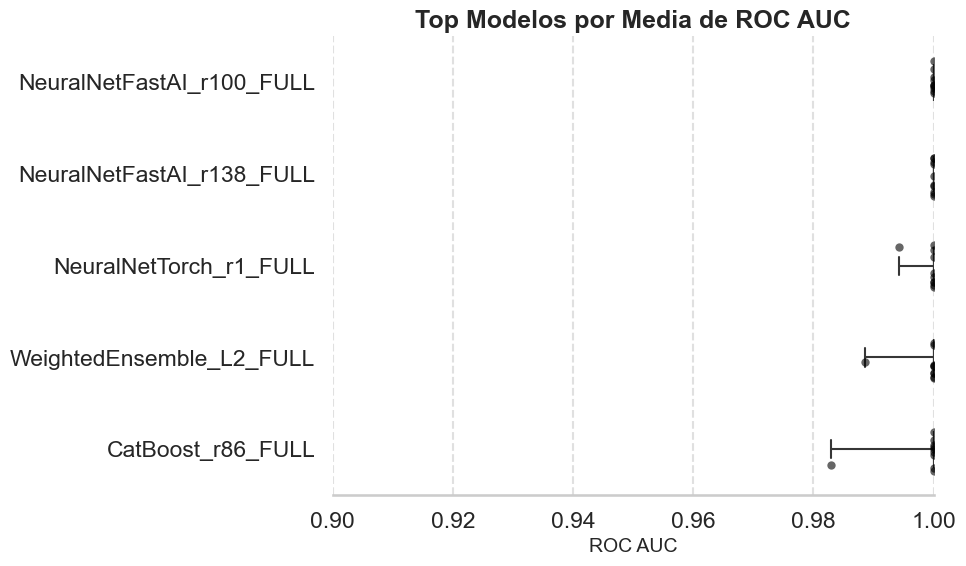

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Altura proporcional a la cantidad de modelos seleccionados
num_models = df_top["model"].nunique()
fig_height = 1.2 * num_models
fig, ax = plt.subplots(figsize=(10, fig_height))

# Boxplot
sns.boxplot(
    data=df_top, x="roc_auc", y="model", hue="model",
    whis=[0, 100], width=0.4, palette="Blues", 
    linewidth=1.5, fliersize=0
)

# Stripplot
sns.stripplot(
    data=df_top, x="roc_auc", y="model", size=6, 
    color="black", alpha=0.6, jitter=0.25
)

# Etiquetas y estilo
ax.set_title("Top Modelos por Media de ROC AUC", fontsize=18, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")

# Límites del eje X ajustados
ax.set_xlim(0.9, 1.0)

# Cuadrícula y diseño
ax.xaxis.grid(True, linestyle="--", alpha=0.6)
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()

In [20]:
df[df['model'] == 'NeuralNetFastAI_r100_FULL']

,model,score_test,roc_auc,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,average_precision,precision,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
2,NeuralNetFastAI_r100_FULL,1.0,1.0,0.843750,0.90,0.736842,0.812865,0.843750,1.0,0.583333,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
65,NeuralNetFastAI_r100_FULL,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.0,1.000000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
103,NeuralNetFastAI_r100_FULL,1.0,1.0,0.968750,0.98,0.933333,0.956463,0.968750,1.0,0.875000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
1,NeuralNetFastAI_r100_FULL,1.0,1.0,0.968750,0.98,0.933333,0.956463,0.968750,1.0,0.875000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
89,NeuralNetFastAI_r100_FULL,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.0,1.000000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
68,NeuralNetFastAI_r100_FULL,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.0,1.000000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
54,NeuralNetFastAI_r100_FULL,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.0,1.000000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
86,NeuralNetFastAI_r100_FULL,1.0,1.0,0.967742,0.98,0.923077,0.951334,0.967742,1.0,0.857143,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
111,NeuralNetFastAI_r100_FULL,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.0,1.000000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
132,NeuralNetFastAI_r100_FULL,1.0,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.0,1.000000,...,"{'layers': [800, 400], 'emb_drop': 0.696080552...","{'epochs': 38, 'best_epoch': 25}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
